Details of both of datasets are available at https://openproblems.bio/neurips_docs/data/dataset/. Details on multi-modal single-cell data in general can be found here https://openproblems.bio/neurips_docs/data/about_multimodal/.

The data is completely preprocessed and contains the necessary annotations for benchmarking integration methods.

Let's start by loading some necessary libraries:

In [30]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.5 MB/s 
     |████████████████████████████████| 3.2 MB 53.0 MB/s 


In [1]:
import os
import gzip

import numpy as np
import pandas as pd
import scanpy as sc 
import episcanpy as esc
import anndata as ann

Mount Google Drive and unzip the dataset.

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab\ Notebooks/single-cell-sequencing
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks/single-cell-sequencing
01_multimodal_autoencoder_cite_data.ipynb
eval_embeddings.py
GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad
GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz
GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad.gz


In [3]:
import shutil
with gzip.open('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad.gz', 'rb') as f_in:
    with open('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
cite = sc.read_h5ad('GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

In [11]:
cite.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAATCACCACGGAAGT-1-s4d9,2115,4.367301,0.916475,G2M,123,3283.0,10.0,Lymph prog,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
GCTGGGTGTACGGATG-1-s4d9,1484,4.974369,0.508755,S,124,2695.0,14.0,CD8+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
TCGAAGTGTGACAGGT-1-s4d9,801,8.842443,0.232119,G1,132,3590.0,14.0,T reg,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
GCAGGCTGTTGCATAC-1-s4d9,1630,8.500611,0.549119,G1,133,5432.0,17.0,CD4+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test


In [12]:
cite.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


We know that the **.X** attribute is supposed to store the counts, but we have two modalities now. Data for both of them will be stored in .X. To subset .X for each individual modality, we can use the .var frame object in the following way:

In [5]:
gex = cite[:, cite.var["feature_types"] == "GEX"]
gex.shape

(90261, 13953)

In [6]:
adt = cite[:, cite.var["feature_types"] == "ADT"]
adt.shape

(90261, 134)

Feature selection. Skip for ADT since there are only 134 features.

In [7]:
sc.pp.highly_variable_genes(gex, n_top_genes=2500, flavor="seurat_v3")

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

Converting GEX to tensor.

In [9]:
hvg_indices = gex.var["highly_variable"]
gex_arr = gex.X.todense()[:, hvg_indices]
gex_tensor = tf.convert_to_tensor(gex_arr)

Converting ADT to tensor.

In [11]:
adt_arr = adt.X.todense()
adt_tensor = tf.convert_to_tensor(adt_arr)

TensorShape([90261, 134])

In [12]:
print(adt_tensor.shape, gex_tensor.shape)

(90261, 134) (90261, 2500)


In [13]:
gex_adt_concat = tf.concat([gex_tensor, adt_tensor], axis = 1)
gex_adt_concat.shape

TensorShape([90261, 2634])

In [18]:
latent_dim = 20 # Specify the size of our latent dimension 
gex_dim = 2500
adt_dim = 134

# Create the model class for our AutoEncoder - this follows mostly for the tutorial from 
# https://www.tensorflow.org/tutorials/generative/autoencoder, except we're putting a multi-modal
# flavor on it and ensuring it uses and reconstructs both GEX and ADT outputs 
class MultiModalAutoencoder(Model):
    def __init__(self, latent_dim, gex_dim, adt_dim):
        super(MultiModalAutoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.gex_dim = gex_dim
        self.adt_dim = adt_dim
        # We have two encoders and decoder - for each modality
        # We divide latent dim by two because we are going to 
        # concatenate the two modalities in latent space and
        # then use that concatenated representation to reconstruct
        # each modality 
        self.gex_encoder = tf.keras.Sequential([
            layers.Dense(250, activation="relu"),
            layers.Dense(latent_dim/2, activation="relu")
        ])
        self.adt_encoder = tf.keras.Sequential([
            layers.Dense(50, activation="relu"),
            layers.Dense(latent_dim/2, activation="relu")
        ])
        self.latent_concat = tf.keras.layers.Concatenate(
            axis=-1
        )
        self.outputs_concat = tf.keras.layers.Concatenate(
            axis=-1
        )
        self.gex_decoder = tf.keras.Sequential([
            layers.Dense(250, activation = "relu"),
            layers.Dense(gex_dim, activation = "relu")
        ])
        self.adt_decoder = tf.keras.Sequential([
            layers.Dense(50, activation = "relu"),
            layers.Dense(adt_dim, activation = "relu")
        ])
        
    def call(self, gex_adt_X):
        # Extract the data
        gex_X = gex_adt_X[:, 0:2500]
        adt_X = gex_adt_X[:, 2500:]
        # Encode both the GEX and ADT data 
        gex_Z = self.gex_encoder(gex_X)
        adt_Z = self.adt_encoder(adt_X)
        # Concatenate the two encoded modalities 
        gex_adt_c = self.latent_concat([gex_Z, adt_Z]) # This is our latent we'll use later
        # Use the concatenated representation to recover both GEX and ADT
        gex_X_decoded = self.gex_decoder(gex_Z)
        adt_X_decoded = self.adt_decoder(adt_Z)
        gex_adt_X_decoded = self.outputs_concat([gex_X_decoded, adt_X_decoded])
        return gex_adt_X_decoded 
    
# I guess we can use the same loss fuction for both modalities
def multimodal_loss(gex_adt_true, gex_adt_pred):
    # GEX loss 
    mse = tf.keras.losses.MeanSquaredError()
    loss = mse(gex_adt_true, gex_adt_pred)
    
    return loss 

In [19]:
autoencoder = MultiModalAutoencoder(latent_dim, gex_dim, adt_dim)
autoencoder.compile(optimizer='adam', loss=multimodal_loss)

In [20]:
autoencoder.fit(gex_adt_concat, gex_adt_concat,
                epochs=10,
                shuffle=True,
                batch_size=512
               )

Epoch 1/10
177/177 [==============================] - 19s 97ms/step - loss: 52188.2812
Epoch 2/10
177/177 [==============================] - 17s 98ms/step - loss: 2048.1379
Epoch 3/10
177/177 [==============================] - 18s 100ms/step - loss: 4674.3716
Epoch 4/10
177/177 [==============================] - 17s 98ms/step - loss: 2330.2249
Epoch 5/10
177/177 [==============================] - 17s 98ms/step - loss: 2811.0337
Epoch 6/10
177/177 [==============================] - 17s 98ms/step - loss: 3068.0896
Epoch 7/10
177/177 [==============================] - 17s 99ms/step - loss: 2576.7852
Epoch 8/10
177/177 [==============================] - 17s 95ms/step - loss: 1736.5322
Epoch 9/10
177/177 [==============================] - 17s 94ms/step - loss: 1940.9845
Epoch 10/10
177/177 [==============================] - 16s 93ms/step - loss: 1897.3989


In [21]:
# Free RAM
del gex
del gex_arr
del adt_arr

In [22]:
autoencoder.trainable = False # Freezes model

In [23]:
gex_Z = autoencoder.gex_encoder(gex_tensor) # Get GEX reduction 
gex_Z.shape

TensorShape([90261, 10])

In [24]:
adt_Z = autoencoder.adt_encoder(adt_tensor) # Get ADT reduction
adt_Z.shape

TensorShape([90261, 10])

In [26]:
Z_concat = tf.concat([gex_Z, adt_Z], axis = 1)
Z_concat.shape

TensorShape([90261, 20])

In [27]:
Z_concat_arr = Z_concat.numpy()
Z_concat_arr.shape

(90261, 20)

In [28]:
from eval_embeddings import EvalEmbeddings

In [31]:
eval_obj = EvalEmbeddings(adata=adt) # Initialize the class
eval_obj.evaluate(Z_concat_arr) # Evaluate

(0.4656544366534876,
    celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
 0      0.129954      0.414087              0.452323           0.384942   
 
    batch_ari  batch_ami  batch_homogeneity  batch_complete  
 0   0.830099   0.595866            0.49714        0.661479  )

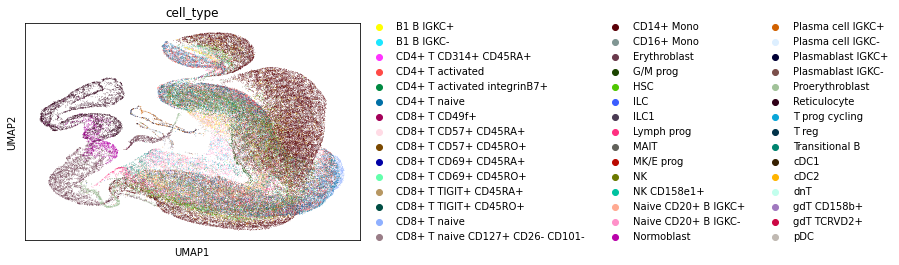

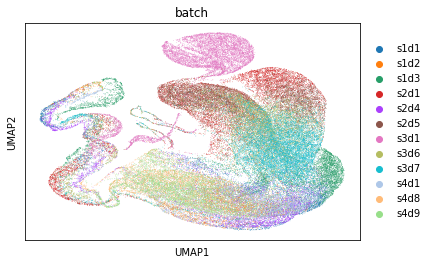

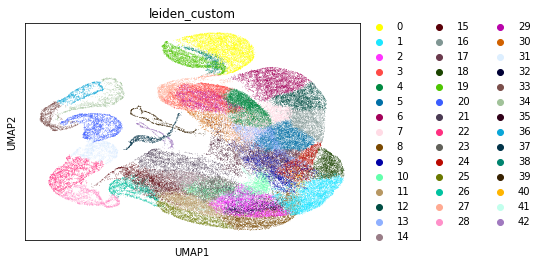

In [32]:
eval_obj.plot() # Plot the results 